In [5]:
#import libraries
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


import confusion_matrix2

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Load training data
train_data = pd.read_csv("../TrainingData/neodata/zahra_all_nonoise_1200.csv").sample(frac=1,random_state=1)        #Make sure data is in random order
test_data = pd.read_csv("../TestData/neodata/zahra_all_nonoise_100.csv").sample(frac=1,random_state=1)
val_data = pd.read_csv("../ValidationData/neodata/zahra_all_nonoise_1200.csv").sample(frac=1,random_state=1)
#train_data.head()


In [7]:
#Normalization / conditioning
'''                                                       #We do not prefer this method as the test, validation and trainign data is not scaled the same way
X_trn = scale(train_data.drop(['target'],axis=1))           #The training and test data could be scaled together and split afterwards.
X_val = scale(val_data.drop(['target'],axis=1))
X_tst = scale(test_data.drop(['target'],axis=1))

Y_trn = np.ravel(train_data['target'])
Y_val = np.ravel(val_data['target'])
Y_tst = np.ravel(test_data['target'])
'''

"                                                       #We do not prefer this method as the test, validation and trainign data is not scaled the same way\nX_trn = scale(train_data.drop(['target'],axis=1))           #The training and test data could be scaled together and split afterwards.\nX_val = scale(val_data.drop(['target'],axis=1))\nX_tst = scale(test_data.drop(['target'],axis=1))\n\nY_trn = np.ravel(train_data['target'])\nY_val = np.ravel(val_data['target'])\nY_tst = np.ravel(test_data['target'])\n"

In [8]:
'''
data = pd.concat([train_data, val_data, test_data])
data = scale(data.drop(['target'],axis=1))
X_trn = data[0:len(train_data)]
X_val = data[len(train_data):len(train_data)+len(val_data)]
X_tst = data[len(train_data)+len(val_data):len(train_data)+len(val_data)+len(test_data)]

Y_trn = np.ravel(train_data['target'])
Y_val = np.ravel(val_data['target'])
Y_tst = np.ravel(test_data['target'])
'''


"\ndata = pd.concat([train_data, val_data, test_data])\ndata = scale(data.drop(['target'],axis=1))\nX_trn = data[0:len(train_data)]\nX_val = data[len(train_data):len(train_data)+len(val_data)]\nX_tst = data[len(train_data)+len(val_data):len(train_data)+len(val_data)+len(test_data)]\n\nY_trn = np.ravel(train_data['target'])\nY_val = np.ravel(val_data['target'])\nY_tst = np.ravel(test_data['target'])\n"

In [9]:

Standard = StandardScaler()         # sklearn.preprocessing 

X_trn = Standard.fit_transform(train_data.drop(['target'],axis =1 ))
X_val = Standard.transform(val_data.drop(['target'],axis=1))
X_tst = Standard.transform(test_data.drop(['target'],axis =1 ))

Y_trn = np.ravel(train_data['target'])
Y_val = np.ravel(val_data['target'])
Y_tst = np.ravel(test_data['target'])



# Fittig the training data first

In [10]:
from sklearn import svm

clf = svm.SVC( kernel="rbf", decision_function_shape="ovo", C=1000, gamma=0.01)
clf.fit(X_trn,Y_trn)

SVC(C=1000, decision_function_shape='ovo', gamma=0.01)

In [11]:
#predicting
Y_val_predict = clf.predict(X_val)


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Validation data : Accuracy 90.552%'}, xlabel='Predicted class', ylabel='True class'>)

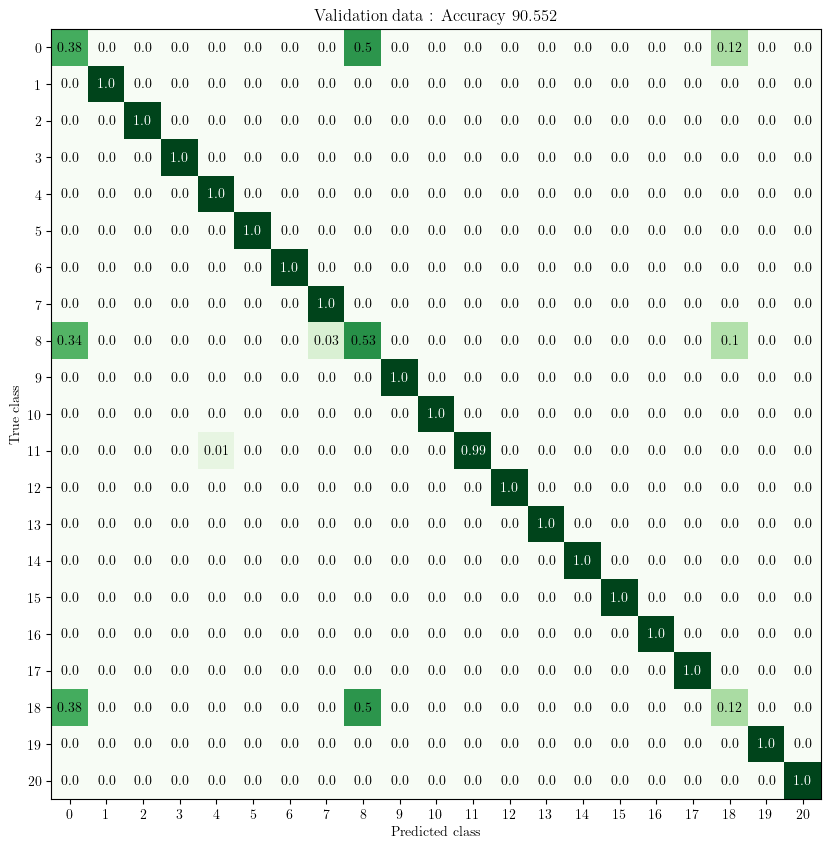

In [12]:
#Generate confusion matrix pdf
confusion_matrix2.confusion_matrix(Y_trn, Y_val_predict, figsize = (10,10), save_fig_name = 'SVM_train.pdf', title = 'Validation data',eval_labels = False)

# Testing on validation data

In [13]:
Y_tst_predict = clf.predict(X_tst)


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Test data : Accuracy 80.952%'}, xlabel='Predicted class', ylabel='True class'>)

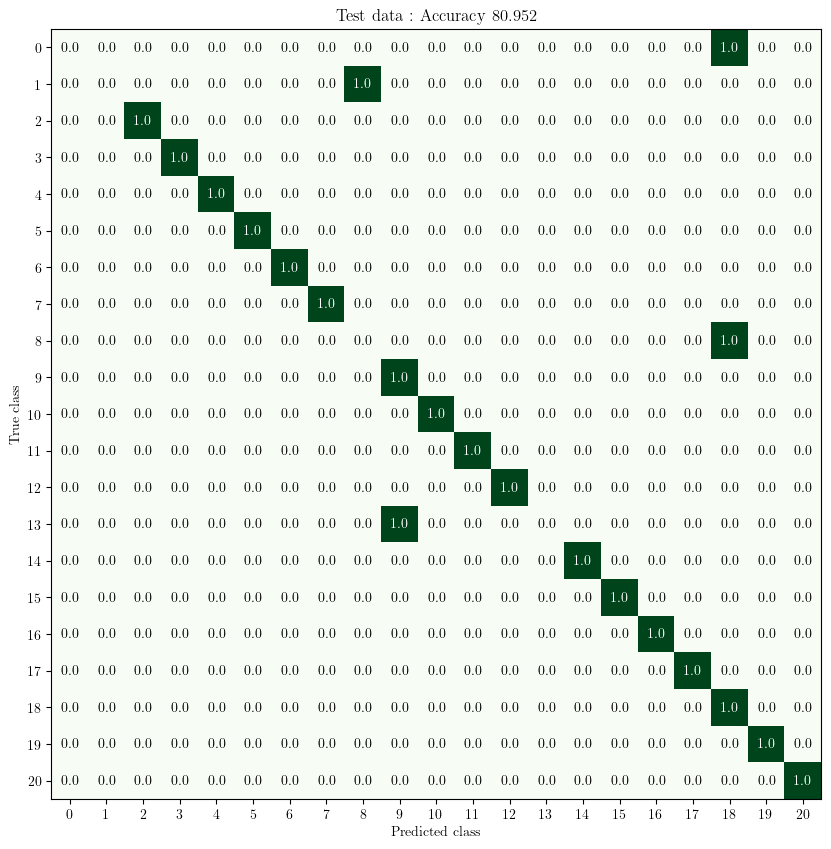

In [14]:
#Generate confusion matrix pdf
confusion_matrix2.confusion_matrix(Y_tst,Y_tst_predict, figsize = (10,10), save_fig_name = 'SVM_val.pdf', title = 'Test data',eval_labels = False)